# Coursera Capstone Project

To build a classifier to predict whether a loan case will be paid off or not.

### Get Data, Visualise & Clean

In [17]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-28 13:58:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-04-28 13:58:02 (12.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [18]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [19]:
df = pd.read_csv('loan_train.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [20]:
# 0 = High School or Below
# 1 = College
# 2 = Bechalor
# 3 = Master or Above
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe3a8e6cf8>]], dtype=object)

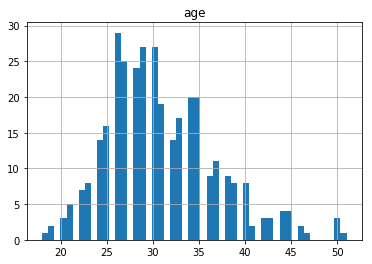

In [21]:
df.hist(column='age', bins=50)

In [22]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender'],
      dtype='object')

In [23]:
# convert the Pandas data frame to a Numpy array
X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values  #.astype(float)
X[0:5]

array([[1000, 30, 45, 'High School or Below', 'male'],
       [1000, 30, 33, 'Bechalor', 'female'],
       [1000, 15, 27, 'college', 'male'],
       [1000, 30, 28, 'college', 'female'],
       [1000, 30, 29, 'college', 'male']], dtype=object)

In [47]:
# Convert categorical variable into dummy/indicator variables
df.replace("female", '0', inplace = True)
df.replace("male", '1', inplace = True)

df.replace("High School or Below", '0', inplace = True)
df.replace("college", '1', inplace = True)
df.replace("Bechalor", '2', inplace = True)
df.replace("Master or Above", '3', inplace = True)

df.replace("PAIDOFF", '0', inplace = True)
df.replace("COLLECTION", '1', inplace = True)

df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,0,1000,30,9/8/2016,10/7/2016,45,0,1
1,2,2,0,1000,30,9/8/2016,10/7/2016,33,2,0
2,3,3,0,1000,15,9/8/2016,9/22/2016,27,1,1
3,4,4,0,1000,30,9/9/2016,10/8/2016,28,1,0
4,6,6,0,1000,30,9/9/2016,10/8/2016,29,1,1


In [48]:
X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values  #.astype(float)
X[0:5]

array([[1000, 30, 45, '0', '1'],
       [1000, 30, 33, '2', '0'],
       [1000, 15, 27, '1', '1'],
       [1000, 30, 28, '1', '0'],
       [1000, 30, 29, '1', '1']], dtype=object)

In [49]:
# Labels
y = df['loan_status'].values
y[0:5]

array(['0', '0', '0', '0', '0'], dtype=object)

In [51]:
# Normalize Data
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.99512471,  0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148,  1.83872837, -2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055,  0.42180183,  0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188,  0.42180183, -2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 ,  0.42180183,  0.42056004]])

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


## 1. k-Nearest Neighbour

In [53]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [54]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['0', '0', '0', '1', '0'], dtype=object)

In [55]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.760869565217
Test set Accuracy:  0.771428571429


In [38]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([ 0.64285714,  0.77142857,  0.7       ,  0.77142857,  0.77142857,
        0.77142857,  0.74285714,  0.77142857,  0.74285714])

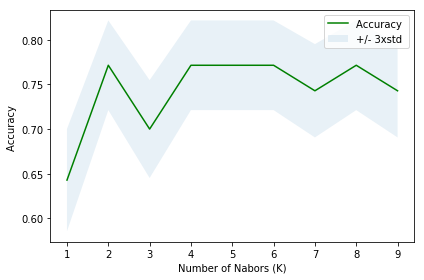

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.771428571429 with k= 2


## 2. Decision Tree

In [65]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-28 14:11:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2019-04-28 14:11:53 (16.1 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [78]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('loan_train.csv')
df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [83]:
X = df[['Principal', 'terms', 'age', 'education', 'Gender']].values  #.astype(float)
X[0:5]

array([[1000, 30, 45, '0', '1'],
       [1000, 30, 33, '2', '0'],
       [1000, 15, 27, '1', '1'],
       [1000, 30, 28, '1', '0'],
       [1000, 30, 29, '1', '1']], dtype=object)

In [84]:
df.replace("female", '0', inplace = True)
df.replace("male", '1', inplace = True)

df.replace("High School or Below", '0', inplace = True)
df.replace("college", '1', inplace = True)
df.replace("Bechalor", '2', inplace = True)
df.replace("Master or Above", '3', inplace = True)

X[0:5]

array([[1000, 30, 45, '0', '1'],
       [1000, 30, 33, '2', '0'],
       [1000, 15, 27, '1', '1'],
       [1000, 30, 28, '1', '0'],
       [1000, 30, 29, '1', '1']], dtype=object)

In [86]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [99]:
y = df["loan_status"]
y[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

## Setting up the Decision Tree

In [100]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [101]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
loanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
loanTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction

In [103]:
predTree = loanTree.predict(X_testset)

In [107]:
y_trainset [0:5]

214       PAIDOFF
162       PAIDOFF
343    COLLECTION
211       PAIDOFF
58        PAIDOFF
Name: loan_status, dtype: object

In [112]:
print (predTree [0:5])
print (y_testset [0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
73        PAIDOFF
24        PAIDOFF
282    COLLECTION
295    COLLECTION
163       PAIDOFF
Name: loan_status, dtype: object


## Evaluation

In [113]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.730769230769


## Visualization

In [115]:
from sklearn.externals.six import StringIO
!conda install -c conda-forge pydotplus -y
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    pydotplus: 2.0.2-py_2 conda-forge

pydotplus-2.0. 100% |################################| Time: 0:00:00  18.97 MB/s


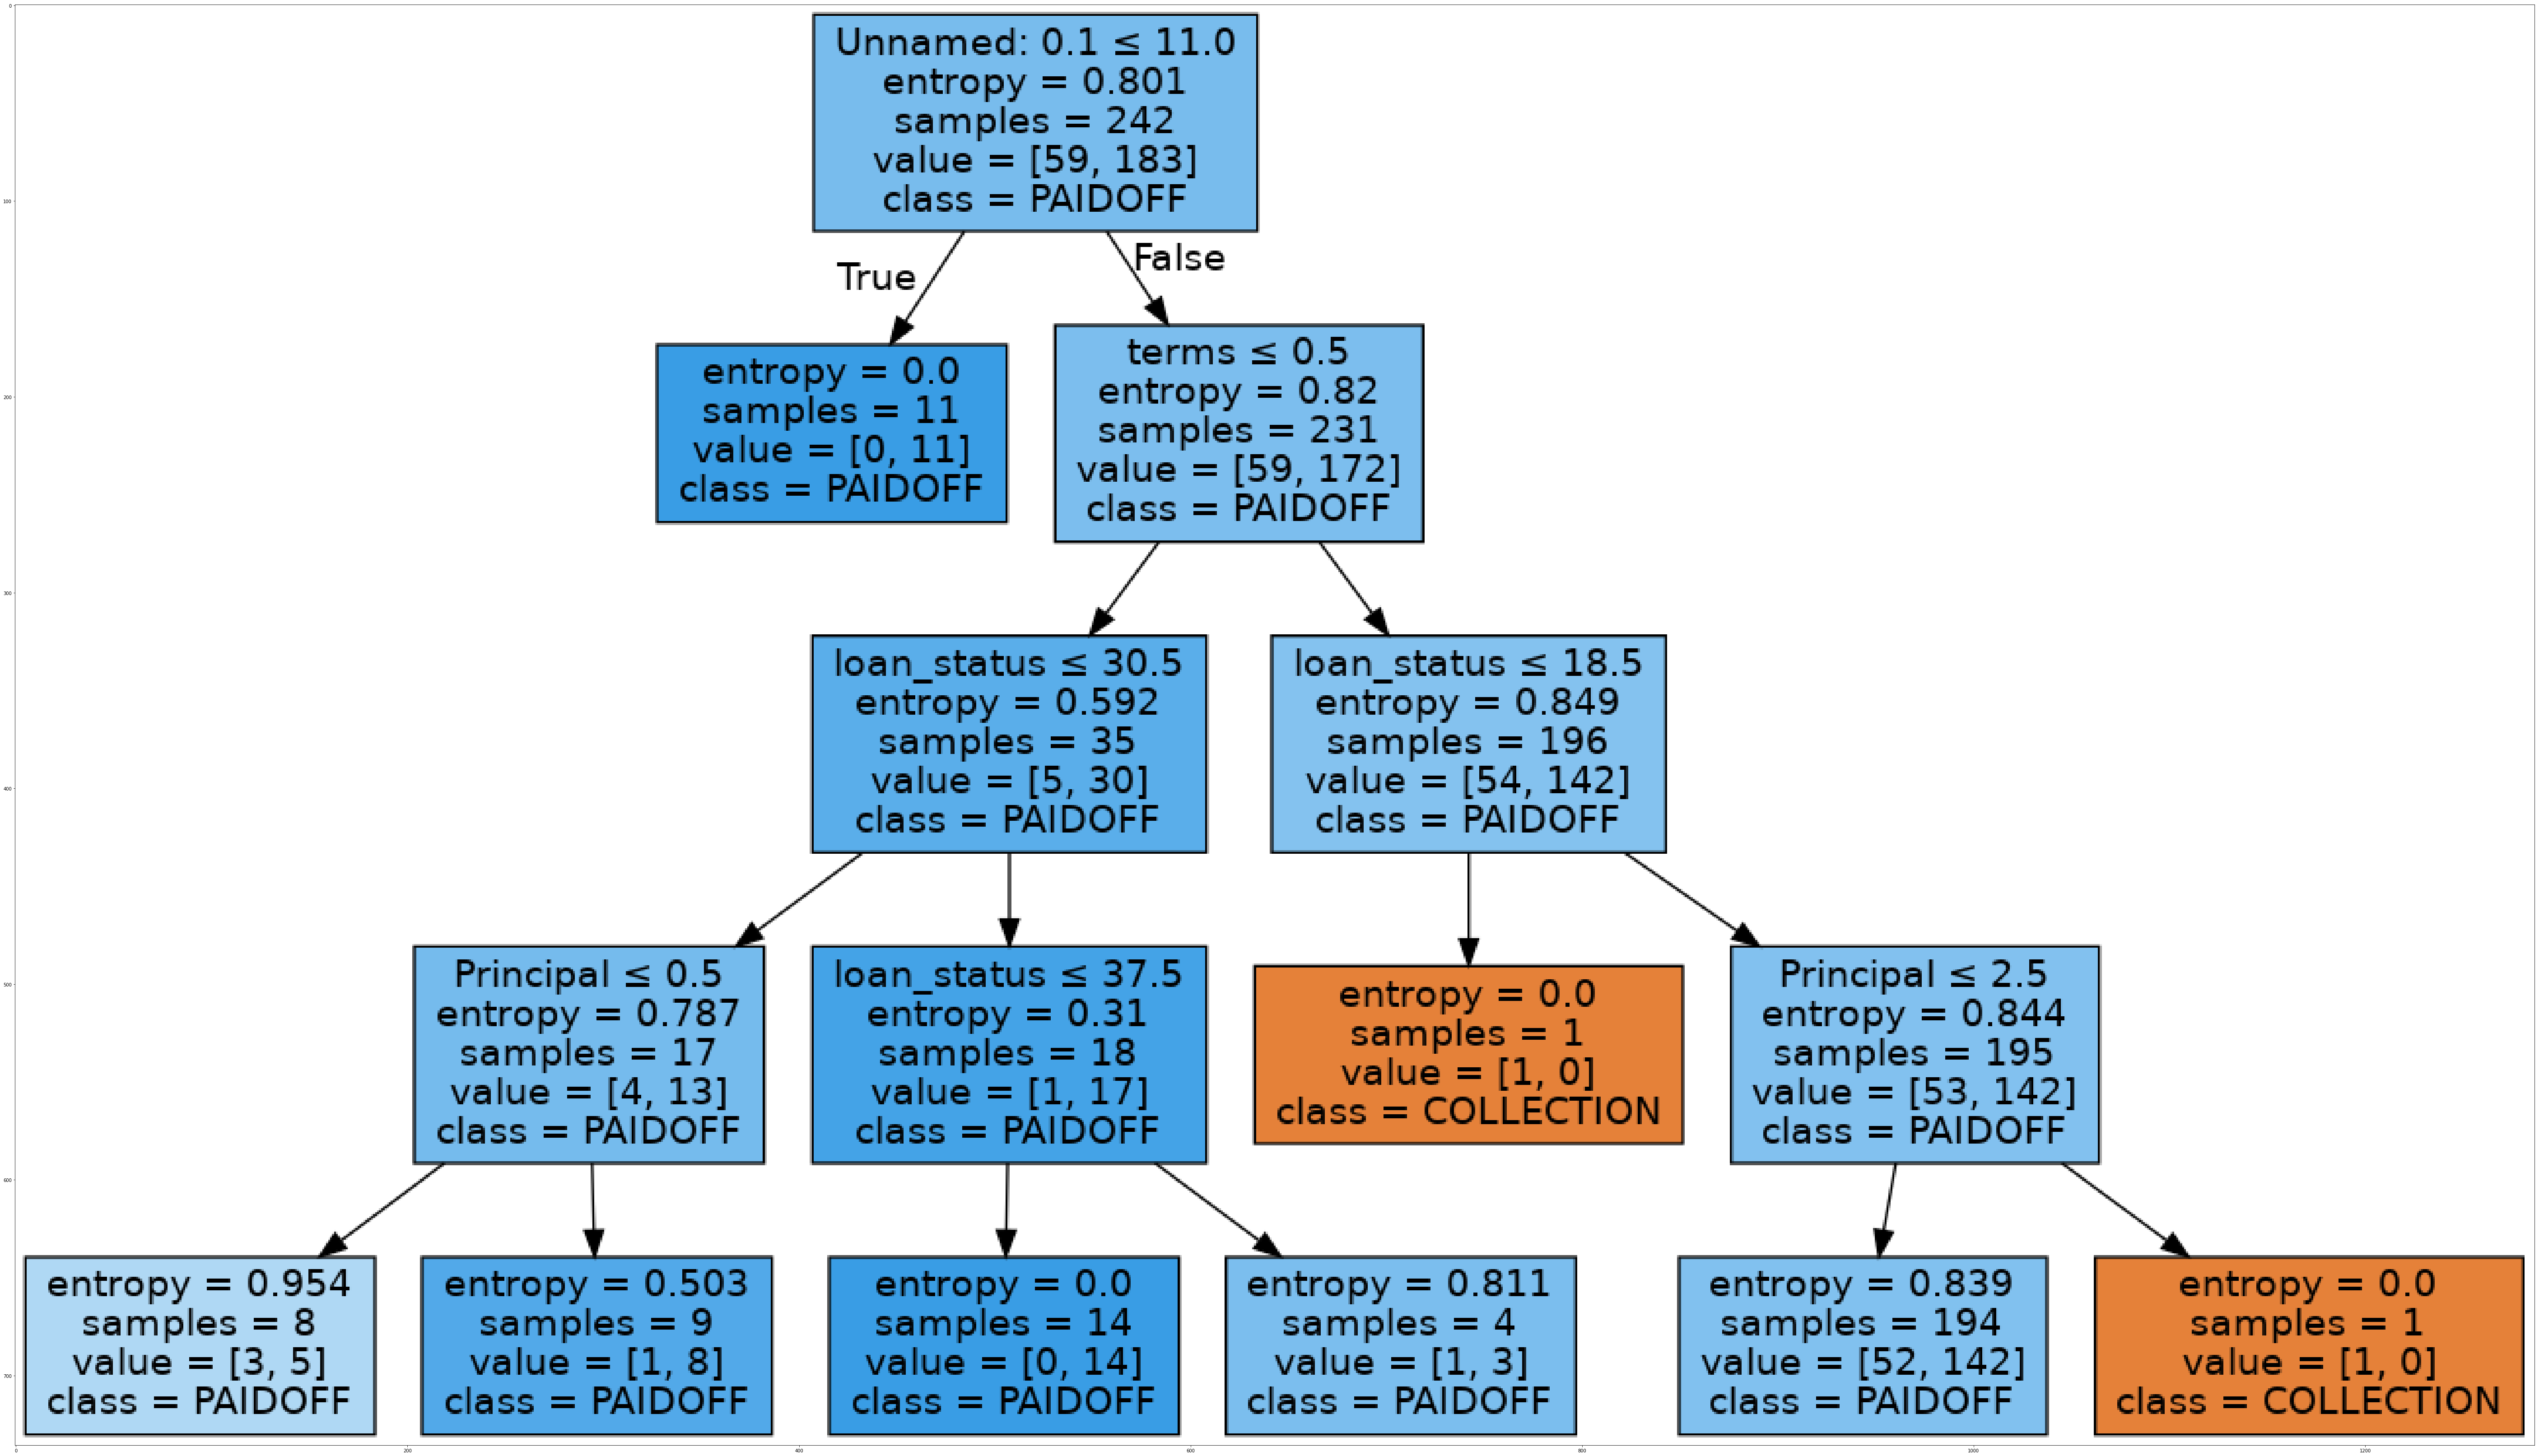

In [119]:
dot_data = StringIO()
filename = "loantree.png"
featureNames = df.columns[0:5]
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(loanTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')